<a href="https://colab.research.google.com/github/fengyankai/CHL5230-Datathon-1/blob/Data-Analysis-Codes/Datathon__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the data
BMI_data = pd.read_csv('/content/drive/My Drive/CHL5230/Datathon #1/CHL5230-F23-Datathon #1-Dataset1.csv')

In [5]:
# Glimpse of the data
print(BMI_data.head())

   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56  Female            3091            90                160   
1   69  Female            2090           106                 27   
2   46    Male            2938            11                 45   
3   32  Female            3022            48                112   
4   60  Female            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                    4            1  1.569070  81.199394  32.981343  
1                    0            9  1.629449  74.273566  27.973877  
2                    2            3  1.637726  71.453466  26.640417  
3                    1            8  1.514198  98.163045  42.813720  
4                    0            7  1.410559  57.323914  28.810685  


In [23]:
# Summary of the data
print(BMI_data.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In [9]:
weight_status = []

# Iterate through the DataFrame and categorize based on BMI
for bmi in BMI_data['BMI']:
    if bmi < 18.5:
        weight_status.append('Underweight')
    elif 18.5 <= bmi <= 24.9:
        weight_status.append('Normal Weight')
    elif 25.0 < bmi <= 29.9:
        weight_status.append('Overweight')
    else:
        weight_status.append('Obese')

# Add the 'Weight_status' column to the DataFrame
BMI_data['Weight_status'] = weight_status


In [10]:
print(BMI_data)

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56  Female            3091            90                160   
1       69  Female            2090           106                 27   
2       46    Male            2938            11                 45   
3       32  Female            3022            48                112   
4       60  Female            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51  Female            2858            65                 37   
23531   20  Female            2573            27                 27   
23532   26  Female            2246            37                 44   
23533   22    Male            1588            24                101   
23534   59    Male            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                        4            1  1.569070  81.199394  32.981343 

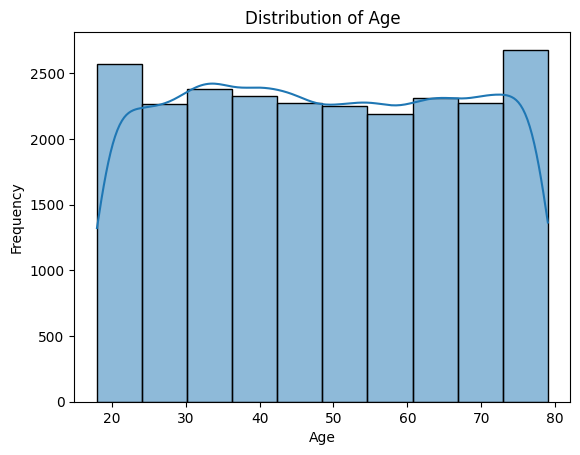

In [11]:
#  Histogram for Age
sns.histplot(BMI_data['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


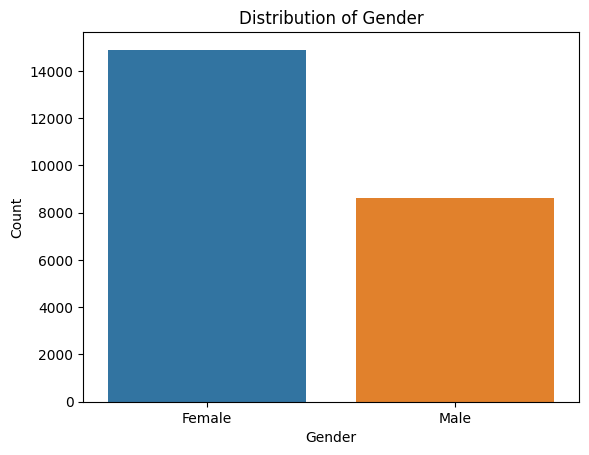

In [27]:
sns.countplot(data=BMI_data, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

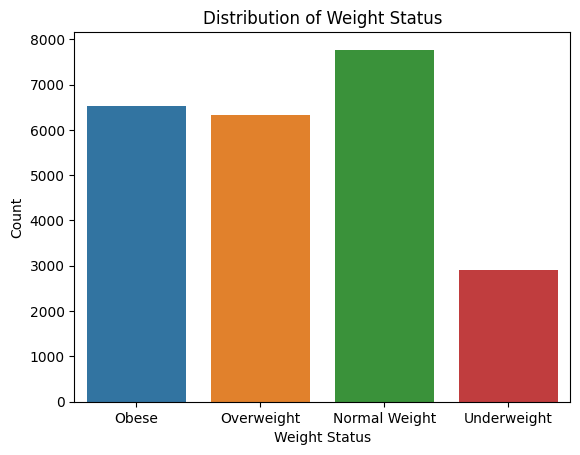

In [26]:
sns.countplot(data=BMI_data, x='Weight_status')
plt.xlabel('Weight Status')
plt.ylabel('Count')
plt.title('Distribution of Weight Status')
plt.show()

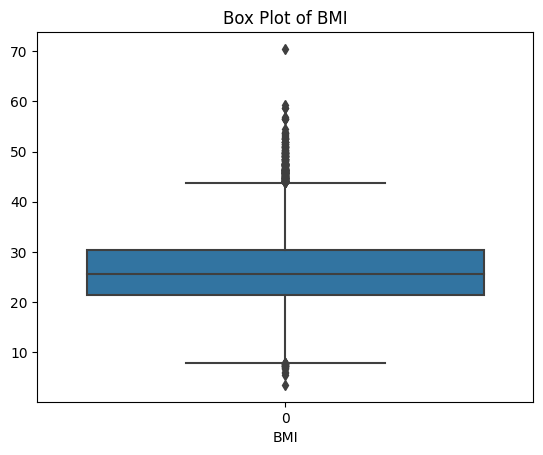

In [29]:
# Box plot for BMI
sns.boxplot(BMI_data['BMI'])
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()

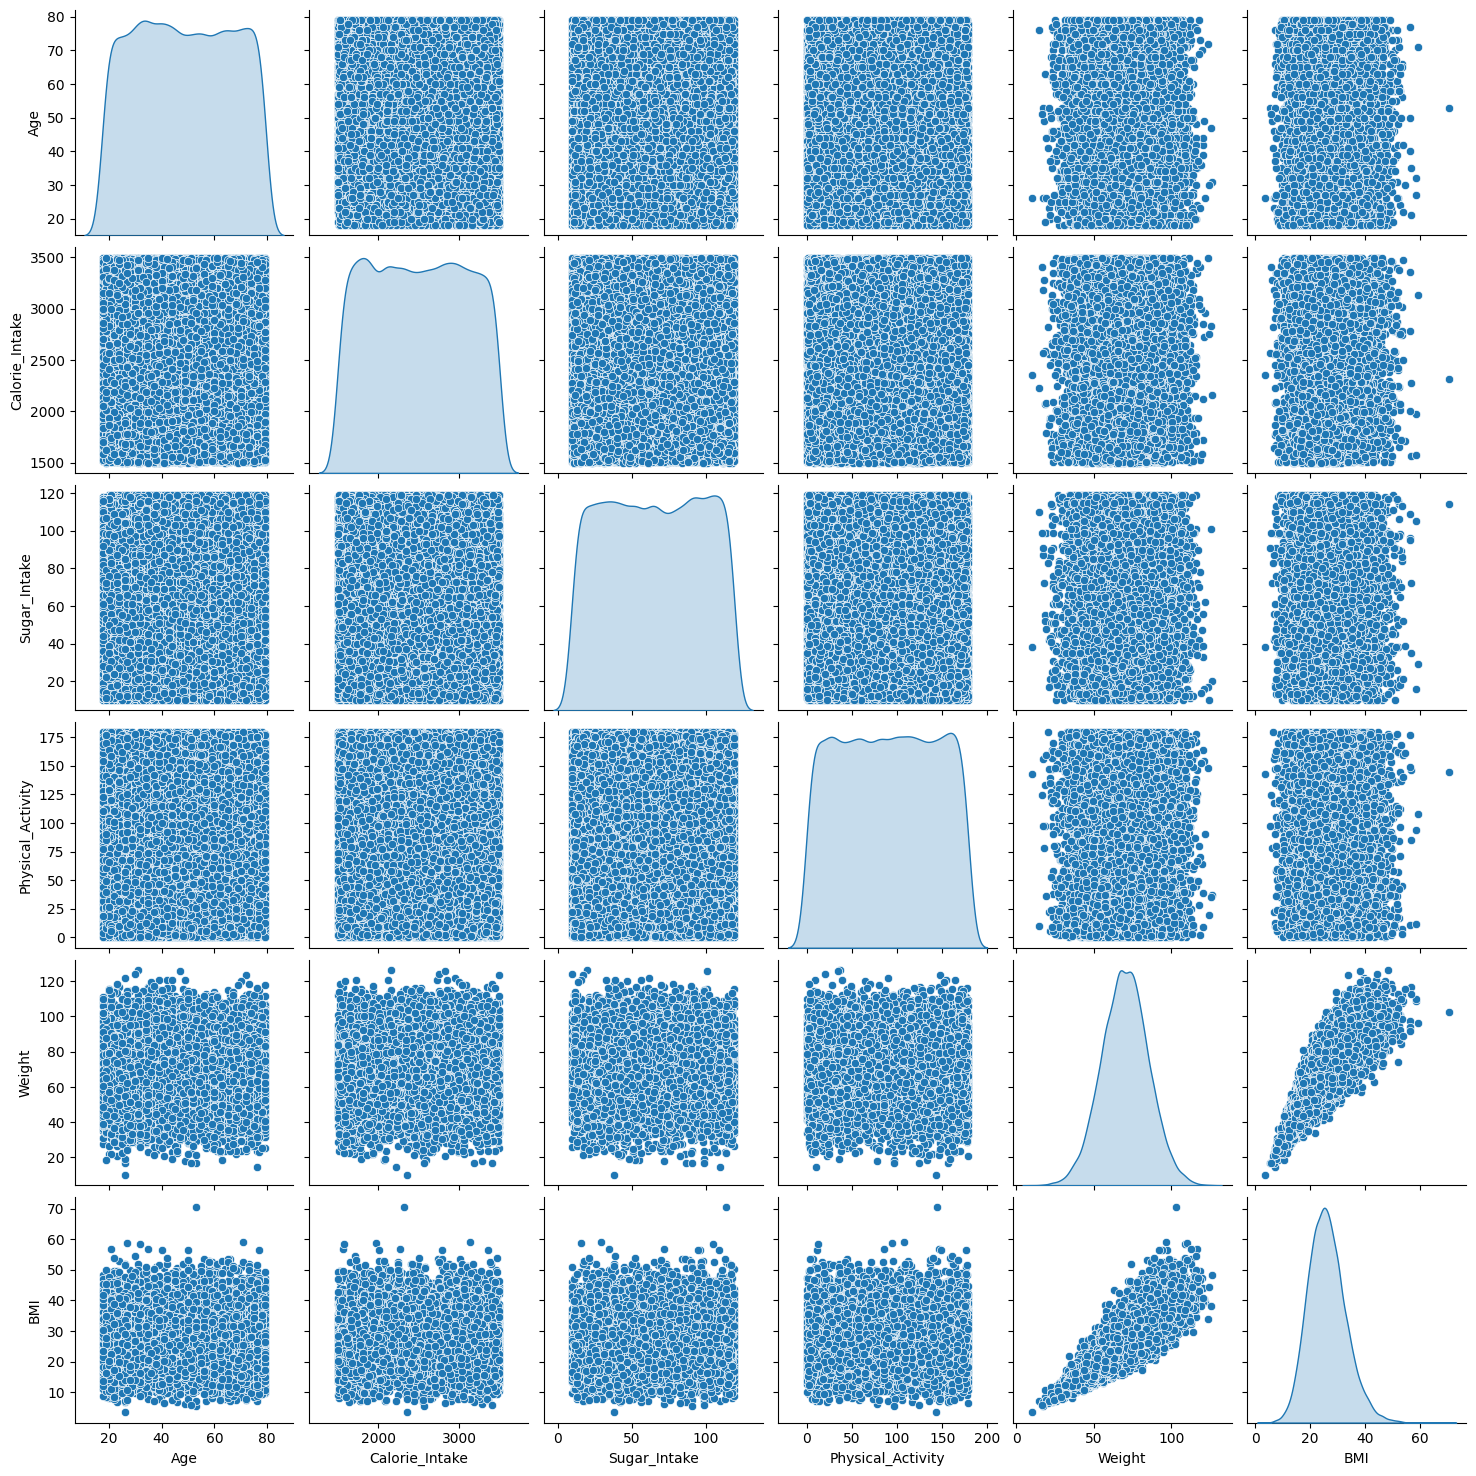

In [17]:
sns.pairplot(BMI_data[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Weight', 'BMI']], diag_kind='kde')
plt.show()

<ipython-input-20-be822aa81c70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = BMI_data.corr()


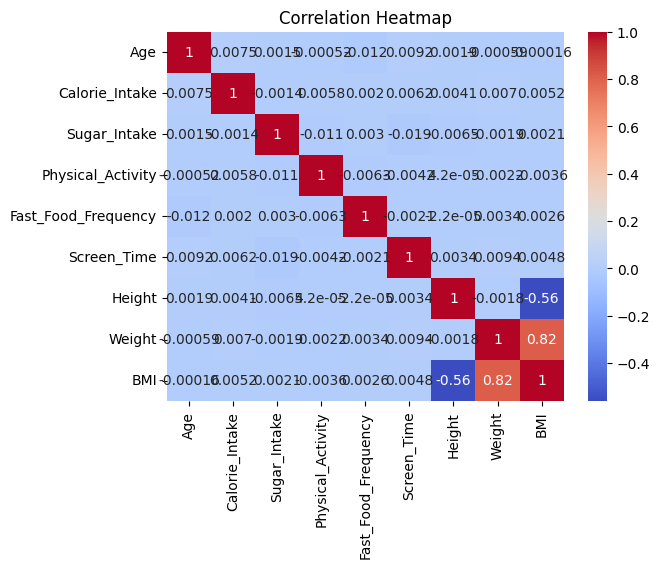

In [20]:
# Calculate the correlation matrix
correlation_matrix = BMI_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Prepare the feature matrix (X) and target variable (y)
X = BMI_data[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = BMI_data['BMI']

KeyError: ignored

In [31]:
# Correlation of features with the target variable ("BMI")
correlation_with_target = correlation_matrix['BMI'].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_target)

BMI                    1.000000
Weight                 0.815340
Calorie_Intake         0.005219
Screen_Time            0.004798
Fast_Food_Frequency    0.002556
Sugar_Intake           0.002117
Age                   -0.000162
Physical_Activity     -0.003638
Height                -0.560640
Name: BMI, dtype: float64
